<a href="https://colab.research.google.com/github/GiuliaCN/MAC0417/blob/main/ep2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##EP2.1 - MAC0417/5768 - Visão e Processamento de Imagens

Professor: Roberto Marcondes

Alunos:

*   Carlos Reis NºUSP 11295741
*   Daniel Silva Lopes da Costa N°USP 11302720
*   Giulia Cunha De Nardi N°10692203

Pasta no Drive: https://drive.google.com/drive/folders/1UCvz5sp8_lax59cgArrOyZSArcTVpvfI?usp=sharing


Github: https://github.com/GiuliaCN/MAC0417




**Objetivo:** Aumentar o conjunto de imagens por meio de transformações de frequência e de espaço. Também queremos anlisar os efeitos dessas traformações nas imagens, por meio de histogramas de imagens.

In [1]:
# Conectar-se ao Drive
from google.colab import drive

# https://docs.python.org/3/library/os.html
import os
import matplotlib.pyplot as plt
import matplotlib
import numpy as np


# skimage.io para carregar as imagens
# https://scikit-image.org/docs/dev/api/skimage.io.html
from skimage import io
from skimage import data, img_as_float
from skimage import exposure

# https://pandas.pydata.org/
import pandas as pd

In [2]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
os.chdir('/content/gdrive/My Drive/IME/3Semestre/Visao/eps/')

### Nome das classes

In [4]:
classes = os.listdir('datasets/originalDataset')
classes

['tesoura',
 'lapis',
 'chave',
 'garfo',
 'oculos',
 'grampeador',
 'copo',
 'desodorante',
 'escova',
 'faca']

### Imagens Originais

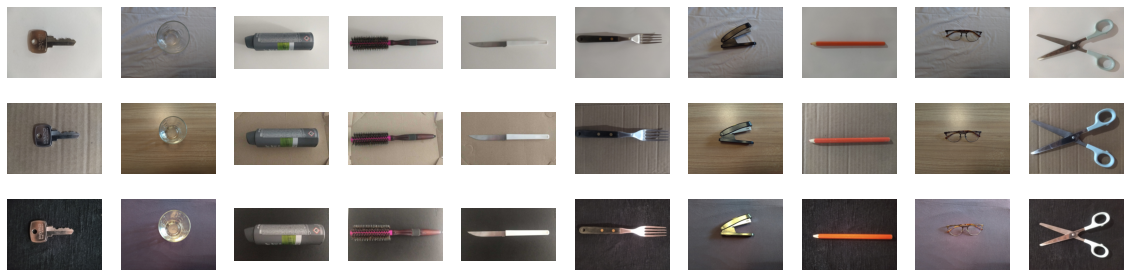

In [9]:
imgs = io.imread_collection("datasets/originalDataset/*/*-1*di1.jpg") # coloque a sua ext
n_colunas, n_linhas = 10, 3

fig, axs = plt.subplots(3, 10, figsize=(20, 5))
num_fotos = n_colunas * n_linhas
for e, objeto in enumerate(imgs[:num_fotos]):
    l, c = (e % n_linhas, e // n_linhas)
    axs[l, c].imshow(objeto)
    axs[l, c].axis('off')
plt.show()

##EP2.1 - Data augmentation
As funções de data augmentation serão aplicadas a imagens em níveis de cinza. Portanto, o dataset original precisará ser convertido para níveis de cinza. Deve-se criar 5 funções de data augmentation. Cada função será aplicada a cada imagem do dataset do EP1. Assim, o augmentedDataset terá 5X o tamanho do original, além disso o dataset original também deverá ser incluído no augmentedDataset.

### RGB2gray (ie converter as imagens RGB originais em níveis de cinza)

Nessa transformação todas as imagens coloridas são passadas para imagens em níveis de cinza. Uma transformação muito importante dado que as demais transformações serão realizadas sobre o resultado dessa função. Para tanto usa-se a função rgb2gray() da biblioteca skimage, a qual realiza a seguinte transformação:
 
$$Y = 0.2125 \cdot R + 0.7154 \cdot G + 0.0721 \cdot B $$
 
O que resulta na matriz em tons de cinza.


In [10]:
'''
Gerar as imagems em preto e branco
'''

from skimage.color import rgb2gray


for classe in classes:
  imgs = io.imread_collection("datasets/originalDataset/"+classe+"/*.jpg") # coloque a sua ext
  list_files = os.listdir('datasets/originalDataset/'+classe)
  list_files.sort()
  i = 0
  for imagem in imgs:
    grayscale = rgb2gray(imagem)
    grayscale *= 255
    grayscale = grayscale.astype('uint8')
    io.imsave("datasets/originalGrayDataset/"+classe+"/"+list_files[i], grayscale)
    i+=1


Podemos ver o resultado dessa transformação em alguns exemplos. Vale destacar que para mostrar corretamente a imagem temos que usar o parâmetro cmap=plt.cm.gray, na função imshow(), pois caso contrário as imagens ficarão em tons de verde azulado.

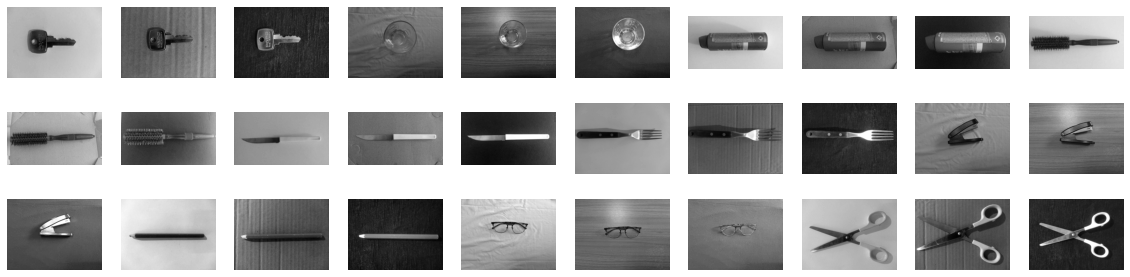

In [9]:
'''
Visualização de alguns objetos após a transformação
'''

imgs = io.imread_collection("datasets/originalGrayDataset/*/*-1*di1.jpg") # coloque a sua ext
n_colunas, n_linhas = 10, 3

fig, axs = plt.subplots(3, 10, figsize=(20, 5))
num_fotos = n_colunas * n_linhas
for e, objeto in enumerate(imgs[:num_fotos]):
    l, c = (e // n_colunas, e % n_colunas)
    axs[l, c].imshow(objeto, cmap=plt.cm.gray)
    axs[l, c].axis('off')
plt.show()

###Soma de fundo com gradiente de níveis de cinza

Para essa transformação foi gerado uma matriz em gradiente de cinza do tamanho da imagens como podemos ver abaixo e seguida foi realizada a multiplicação pixel a pixel,  que tornou o canto superior direito mais escuro enquanto conservou o tom no canto inferior esquerdo. Adotando como $pixel$ o valor de um determinado pixel da imagem, foi realizada a seguinte operação:

$$pixel_{transformado} = pixel_{img} \cdot pixel_{gradiente}$$

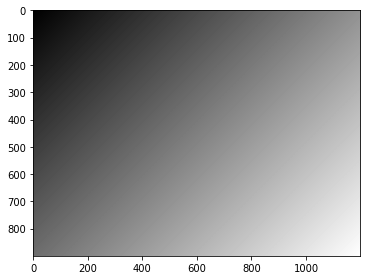

In [11]:
grad1 = np.ones((900, 1200), dtype='float32')
for i in range(1200):
  for j in range(900):
    grad1[j][i] = (i+j)/(1200+900)

io.imshow(grad1, cmap=plt.cm.gray)

Algumas imagens tem dimensão diferente de 900X1200, nesse caso para essas imagens o algoritmo gera o matriz de gradiente personalizada para as dimensões dela. Isso deixou a função bem mais lenta, o que evidencia a importância de ter dados padronizados para o tratamento da informação.

In [ ]:
for classe in classes:
  imgs = io.imread_collection("datasets/originalGrayDataset/"+classe+"/*.jpg") # coloque a sua ext
  list_files = os.listdir('datasets/originalGrayDataset/'+classe)
  list_files.sort()
  a = 0
  for imagem in imgs:
    x = imagem.shape[0]
    y = imagem.shape[1]
    if imagem.shape[0] == 900:
        grad = grad1;
    else:
      grad = np.ones((x, y), dtype='float32')
      for i in range(y):
        for j in range(x):
          grad[j][i] = (i+j)/(x+y)
    imagem = imagem * grad
    #imagem[imagem>255] = 255
    imagem = imagem.astype('uint8')
    #io.imsave("datasets/augmentedDataset/sumDataset/"+classe+"/"+list_files[a], imagem)
    a+=1

Podemos visualizar alguns exemplos dessa transformação, onde fica clara a influência do gradiente sobre a imagem, passando de tons mais escuros para mais claros.

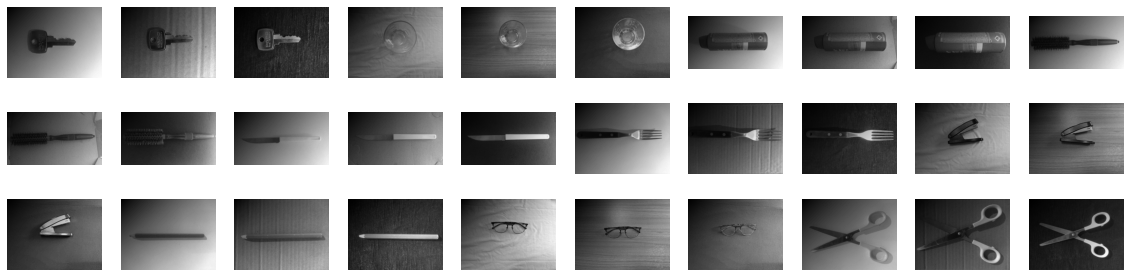

In [12]:
'''
Visualização de alguns objetos após a transformação
'''
imgs = io.imread_collection("datasets/augmentedDataset/sumDataset/*/*-1*di1.jpg") # coloque a sua ext
n_colunas, n_linhas = 10, 3

fig, axs = plt.subplots(3, 10, figsize=(20, 5))
num_fotos = n_colunas * n_linhas
for e, objeto in enumerate(imgs[:num_fotos]):
    l, c = (e // n_colunas, e % n_colunas)
    axs[l, c].imshow(objeto, cmap=plt.cm.gray)
    axs[l, c].axis('off')
plt.show()

###Logaritmo da imagem

Nesse caso realizamos a transformação logarítmica da imagem, o que diminui o contraste da imagem, para tanto utilizamos a função exposure.adjust_log(imagem, 1) da biblioteca skimage. Trata-se de outra transformação especial, onde cada pixel é alterado de maneira independente. Vale destacar que essa função já possui mecanismos para lidar com o caso problemático onde o valor do pixel é zero.

In [ ]:
for classe in classes:
  imgs = io.imread_collection("datasets/originalGrayDataset/"+classe+"/*.jpg") # coloque a sua ext
  list_files = os.listdir('datasets/originalGrayDataset/'+classe)
  list_files.sort()
  i = 0
  for imagem in imgs:
    logarithmic_corrected = exposure.adjust_log(imagem, 1)
    #io.imsave("datasets/augmentedDataset/logDataset/"+classe+"/"+list_files[i], logarithmic_corrected)
    i+=1

Podemos perceber na imagem abaixo um leve perda de contraste entre as imagens, o que é provocado pela transformação logarítmica.

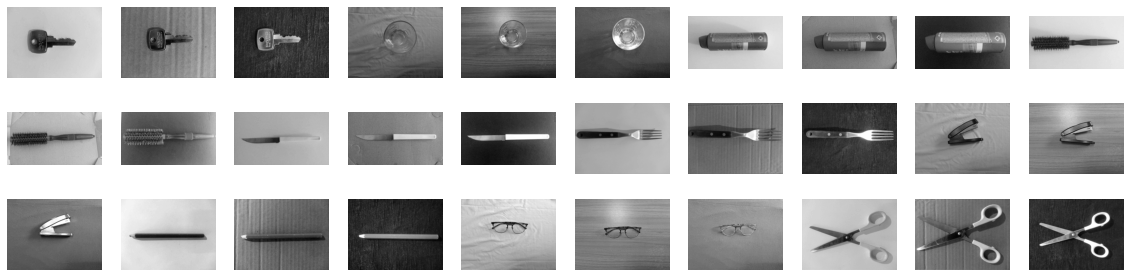

In [13]:
'''
Visualização de alguns objetos após a transformação
'''
imgs = io.imread_collection("datasets/augmentedDataset/logDataset/*/*-1*di1.jpg") # coloque a sua ext
n_colunas, n_linhas = 10, 3

fig, axs = plt.subplots(3, 10, figsize=(20, 5))
num_fotos = n_colunas * n_linhas
for e, objeto in enumerate(imgs[:num_fotos]):
    l, c = (e // n_colunas, e % n_colunas)
    axs[l, c].imshow(objeto, cmap=plt.cm.gray)
    axs[l, c].axis('off')
plt.show()

###Exponencial da imagem

Nessa transformação o objetivo é deixar as imagens mais claras. Esse tipo de transformação pode ser importante no tratamento de imagens muito escuras. Para tanto foi realizada a seguinte operação para cada pixel usando o recursos da biblioteca numpy:

$$pixel_{transformado} = e^{pixel_{img} - 1}$$

In [6]:
for classe in classes:
  imgs = io.imread_collection("datasets/originalGrayDataset/"+classe+"/*.jpg") # coloque a sua ext
  list_files = os.listdir('datasets/originalGrayDataset/'+classe)
  list_files.sort()
  i = 0
  for imagem in imgs:
    imagem = (imagem/255).astype('float32')
    imagem = np.exp(imagem-1)
    imagem = imagem/(np.max(np.max(imagem)))

    imagem *= 255
    imagem = imagem.astype('uint8')
    #io.imsave("datasets/augmentedDataset/expDataset/"+classe+"/"+list_files[i], imagem)
    i+=1

Não é possível ver com muita clareza o resultado pois a função imshow adequa a imagem a nova faixa de parâmetros, mas como olhamos a imagem na pasta da transformação fica evidente a mudança de tons.

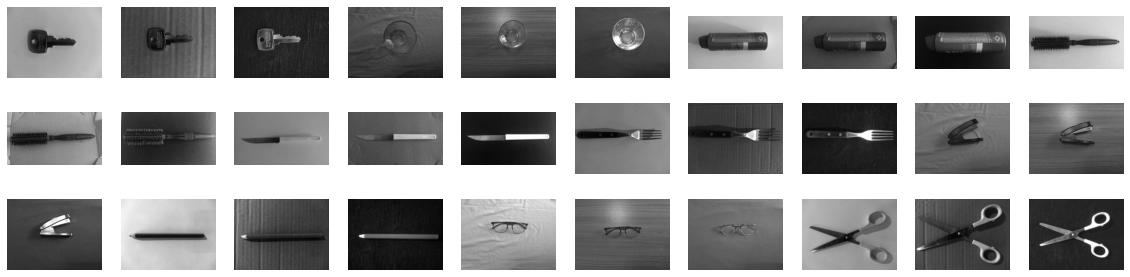

In [7]:
'''
Visualização de alguns objetos após a transformação
'''
imgs = io.imread_collection("datasets/augmentedDataset/expDataset/*/*-1*di1.jpg") # coloque a sua ext
n_colunas, n_linhas = 10, 3

fig, axs = plt.subplots(3, 10, figsize=(20, 5))
num_fotos = n_colunas * n_linhas
for e, objeto in enumerate(imgs[:num_fotos]):
    l, c = (e // n_colunas, e % n_colunas)
    #objeto = objeto.astype("float64")
    objeto = np.array(objeto, dtype='float')
    objeto = objeto/255
    axs[l, c].imshow(objeto, cmap=plt.cm.gray)
    axs[l, c].axis('off')
plt.show()

###Filtro da média implementado usando convolução

Nesse caso usamos o filtro da média com convolução. Para tanto, a função abaixo calcula o valor do novo pixel como a média dele com seus oito vizinhos. Por isso o selem é 3X3 o que gera uma máscara para a convolução de 3X3. Se aumentarmos esse tamanhos teremos uma imagem ainda mais desfocada.

In [ ]:
from skimage.morphology import disk
from skimage.filters import rank

selem = np.ones((3,3))

for classe in classes:
  imgs = io.imread_collection("datasets/originalGrayDataset/"+classe+"/*.jpg") # coloque a sua ext
  list_files = os.listdir('datasets/originalGrayDataset/'+classe)
  list_files.sort()
  i = 0
  for imagem in imgs:
    normal_result = rank.mean(imagem, selem=selem)
    #io.imsave("datasets/augmentedDataset/meanDataset/"+classe+"/"+list_files[i], normal_result)
    i+=1



Podemos observar o resultado da transformação, é possível perceber que a imagem desfoca um pouco, como a máscara era pequena a imagem não teve um grande desfoque.

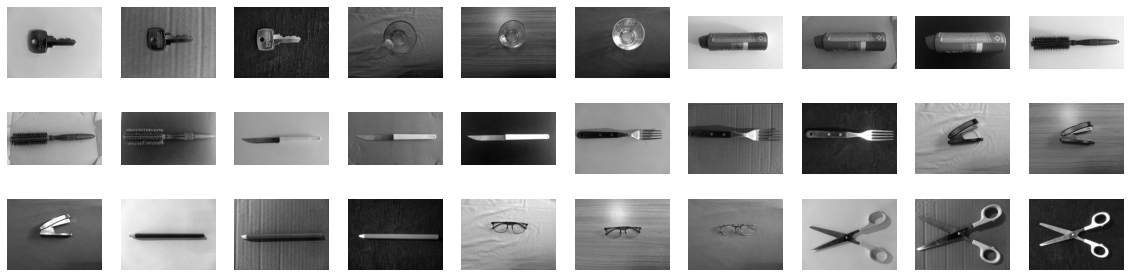

In [8]:
'''
Visualização de alguns objetos após a transformação
'''
imgs = io.imread_collection("datasets/augmentedDataset/meanDataset/*/*-1*di1.jpg") # coloque a sua ext
n_colunas, n_linhas = 10, 3

fig, axs = plt.subplots(3, 10, figsize=(20, 5))
num_fotos = n_colunas * n_linhas
for e, objeto in enumerate(imgs[:num_fotos]):
    l, c = (e // n_colunas, e % n_colunas)
    axs[l, c].imshow(objeto, cmap=plt.cm.gray)
    axs[l, c].axis('off')
plt.show()